In [1]:
import json
import requests
from pathlib import Path
from os.path import join as path_join

list_repos = []

for i in range(2):
    github_api_url = f"https://api.github.com/orgs/src-d/repos?page={i + 1}&per_page=100"
    r = requests.get(github_api_url)
    r_json = json.loads(r.text)
    for repo in r_json:
        if not repo["fork"]:
            list_repos.append((repo["name"], repo["ssh_url"]))
print(len(list_repos))
for repo_name, ssh_url in list_repos:
    dest = path_join("repos", repo_name)
    if not Path(dest).exists():
        !git clone {ssh_url} {dest}

112


In [2]:
%matplotlib inline

import logging
import coloredlogs
import matplotlib as mpl
import matplotlib.pyplot as plt
from run import display_html, no_logs, run, run_one, run_and_print

coloredlogs.install(level="DEBUG")
logging.getLogger("matplotlib.axes._base").setLevel(logging.INFO)

2019-04-18 11:53:41 milamber matplotlib.pyplot[11503] DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
!srcd init repos

INFO[0000] removing container srcd-cli-bblfshd          
INFO[0000] removing container srcd-cli-daemon           
INFO[0001] removing container srcd-cli-gitbase          
INFO[0001] starting daemon with working directory: /home/mog/work/talk-cap/demo/repos 
WARN[0003] new version of engine is available. Please download the latest release here: https://github.com/src-d/engine/releases 


In [4]:
!srcd sql "SHOW TABLES;"

INFO[0003] this is taking a while, if this is the first time you launch sql client, it might take a few more minutes while we install all the required images 
+--------------+
|    TABLE     |
+--------------+
| blobs        |
| commit_blobs |
| commit_files |
| commit_trees |
| commits      |
| files        |
| ref_commits  |
| refs         |
| remotes      |
| repositories |
| tree_entries |
+--------------+


In [5]:
run_and_print("""
SELECT repository_id, cf.file_path, LANGUAGE(cf.file_path, f.blob_content) as lang
FROM   files AS f
       NATURAL JOIN commit_files AS cf
       NATURAL JOIN refs
WHERE  ref_name = 'HEAD'
       AND lang = 'Python';
""")

2019-04-18 11:53:56 milamber run[11503] INFO done in 5.72 seconds


,repository_id,file_path,lang
0,best-practices-experiments,best_practices/__init__.py,Python
1,apollo,apollo/__init__.py,Python
2,apollo,apollo/__main__.py,Python
3,apollo,apollo/bags.py,Python
4,apollo,apollo/cassandra_utils.py,Python
5,apollo,apollo/graph.py,Python
6,apollo,apollo/hasher.py,Python
7,apollo,apollo/query.py,Python
8,apollo,apollo/warmup.py,Python
9,apollo,setup.py,Python


In [6]:
python_file = "repos/nopol-experiments/src/Config.py"


identifiers = !srcd parse uast {python_file} --query "//uast:Identifier/Name"


for identifier in sorted(set(i[1:-1] for i in identifiers[1:])):
    print(identifier)
    
!srcd parse uast {python_file}


     --config string   config file (default is $HOME/.srcd/config.yml
 -h, --help           help for uas
 -l, --lang string    avoid language detection, use this parse
 -m, --mode string    UAST parsing mode: semantic|annotated|native (default "semantic"
 -q, --query string   XPath query applied to the parsed UAST
 -v, --verbose         if true, log all of the thing
 srcd parse uast [file-path] [flags
lags
lobal Flags
ould not read repos/nopol-experiments/src/Config.py: open repos/nopol-experiments/src/Config.py: no such file or director
sage
Error: could not read repos/nopol-experiments/src/Config.py: open repos/nopol-experiments/src/Config.py: no such file or directory
Usage:
  srcd parse uast [file-path] [flags]

Flags:
  -h, --help           help for uast
  -l, --lang string    avoid language detection, use this parser
  -m, --mode string    UAST parsing mode: semantic|annotated|native (default "semantic")
  -q, --query string   XPath query applied to the parsed UASTs

Global Flag

In [7]:
!srcd sql "SELECT * FROM repositories;"

+-----------------------------------------+
|              REPOSITORY ID              |
+-----------------------------------------+
| awesome-machine-learning-on-source-code |
| beanstool                               |
| beanstalk                               |
| apollo                                  |
| borges                                  |
| best-practices-experiments              |
| berserker                               |
| caddy-build                             |
| code-annotation                         |
| blog                                    |
| code-completion                         |
| charts                                  |
| code2vec                                |
| coming                                  |
| ci                                      |
| combustion                              |
| conferences                             |
| coming-experiments                      |
| coreos-nvidia                           |
| core-retrieval                

In [8]:
repos = run("""
    SELECT * FROM repositories;
""")
print("got %d repositories" % len(repos))

2019-04-18 11:53:57 milamber run[11503] INFO done in 0.01 seconds


got 121 repositories


In [9]:
commits = run("""
  SELECT commit_hash
  FROM ref_commits
  WHERE ref_name = 'HEAD'
    ORDER BY history_index DESC
""")
print('got %d commits on HEAD' % len(commits))
commits[:5]

2019-04-18 11:53:57 milamber run[11503] INFO done in 0.61 seconds


got 22517 commits on HEAD


('5d7303c49ac984a9fec60523f2d5297682e16646',
 '5fddbeb678bd2c36c5e5c891ab8f2b143ced5baf',
 'c088fd6a7e1a38e9d5a9815265cb575bb08d08ff',
 'fc9f0643b21cfe571046e27e0c4565f3a1ee96c8',
 'c2bbf9fe8009b22d0f390f3c8c3f13937067590f')

In [10]:
# get the corresponding timestamps

timestamps = run("""
  SELECT commit_author_when
  FROM commits
  WHERE commit_hash IN (%s)
  ORDER BY commit_author_when
""" % (', '.join('"%s"' % x for x in commits)))

2019-04-18 11:54:00 milamber run[11503] INFO done in 2.26 seconds


In [11]:
years, months, days, counts = run("""
  SELECT YEAR(commit_author_when) as year,
         MONTH(commit_author_when) as month,
         DAY(commit_author_when) as day,
         COUNT(*) as n
  FROM commits
  GROUP BY year, month, day
  ORDER BY year, month, day
""")

2019-04-18 11:54:00 milamber run[11503] INFO done in 0.73 seconds


2019-04-18 11:54:01 milamber matplotlib.font_manager[11503] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/mog/.virtualenvs/talk-cap/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2019-04-18 11:54:01 milamber matplotlib.font_manager[11503] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mog/.virtualenvs/talk-cap/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


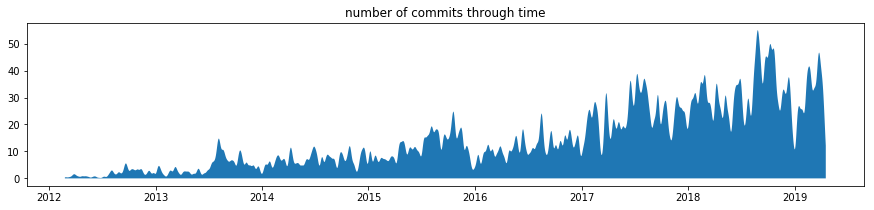

In [12]:
import datetime
from numpy import zeros
import pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.signal import convolve, slepian

def scatter_counts(years, months, days, counts):
    """Turn a date-value mapping to a uniform time series."""
    dr = pandas.date_range(datetime.datetime(years[0], months[0], days[0]),
                           datetime.datetime(years[-1], months[-1], days[-1]))
    vals = zeros(len(dr))
    filled = {(y, m, d): c for (y, m, d, c) in zip(years, months, days, counts)}
    for i, dt in enumerate(dr):
        vals[i] = filled.get((dt.year, dt.month, dt.day), 0)
    window = slepian(32, 0.5)
    window /= sum(window)
    return dr, convolve(vals, window, "same")

def plot_commits_through_time(years, months, days, counts):
    plt.title("number of commits through time")
    plt.fill_between(*scatter_counts(years, months, days, counts))
    plt.grid(False)

plt.figure(figsize=(15, 3))
plot_commits_through_time(years, months, days, counts)



2019-04-18 11:54:01 milamber run[11503] INFO done in 0.45 seconds


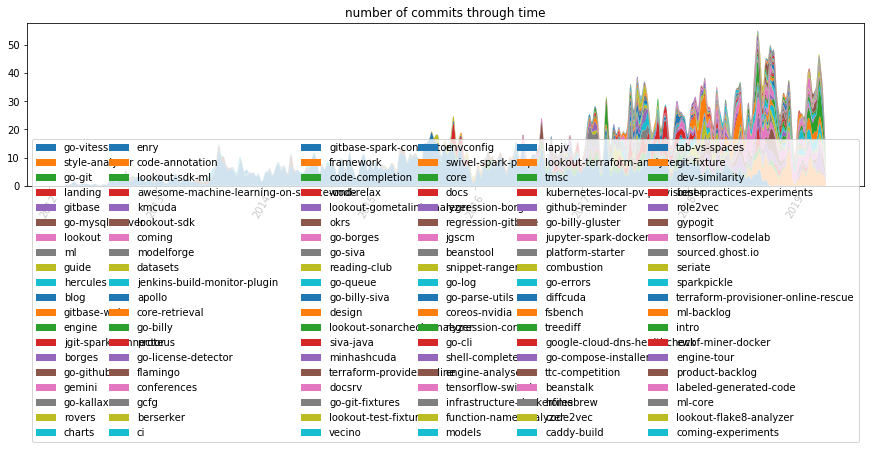

In [13]:


repos, years, months, days, counts = run("""
  SELECT repository_id as repo,
         YEAR(commit_author_when) as year,
         MONTH(commit_author_when) as month,
         DAY(commit_author_when) as day,
         COUNT(*) as n
  FROM commits
  WHERE commit_author_when <= now()
  GROUP BY repo, year, month, day
  ORDER BY repo, year, month, day
""")

from itertools import groupby
repos_dict = {}
for r, g in groupby(zip(repos, years, months, days, counts), lambda t: t[0]):
    g = list(g)
    repos_dict[r] = [[e[i] for e in g] for i in range(1, 5)]
ncommits = sorted([(sum(p[-1]), r) for (r, p) in repos_dict.items()], reverse=True)
timeline = sorted(set(zip(years, months, days)))
date_range = pandas.date_range(datetime.datetime(*timeline[0]),
                               datetime.datetime(*timeline[-1]))

def smooth_scatter_counts(years, months, days, counts):
    """Turn a date-value mapping to a uniform time series."""
    vals = zeros(len(date_range))
    filled = {(y, m, d): c for (y, m, d, c) in zip(years, months, days, counts)}
    for i, dt in enumerate(date_range):
        vals[i] = filled.get((dt.year, dt.month, dt.day), 0)
    window = slepian(32, 0.5)
    window /= sum(window)
    return convolve(vals, window, "same")

plt.figure(figsize=(15, 3))

plt.title("number of commits through time")
matrix = zeros((len(repos_dict), len(date_range)))
for i, (_, repo) in enumerate(ncommits):
      matrix[i] = smooth_scatter_counts(*repos_dict[repo])
plt.stackplot(date_range, matrix, labels=[r for (_, r) in ncommits])
plt.xticks(rotation=60)
plt.legend(mode="expand", loc="lower center", ncol=6, bbox_to_anchor=(0, -1.6, 1., 0))
plt.show()

In [14]:
langs, counts = run("""
SELECT lang, COUNT(*) as n
FROM (
    SELECT LANGUAGE(cf.file_path, f.blob_content) as lang
    FROM   files AS f
           NATURAL JOIN commit_files cf
           NATURAL JOIN refs
    WHERE  ref_name = 'HEAD'
           AND file_path NOT LIKE 'third_party/%%'
) AS t
WHERE lang is not null
GROUP BY lang
ORDER BY 2 DESC
""")

2019-04-18 11:54:12 milamber run[11503] INFO done in 7.30 seconds


2019-04-18 11:54:12 milamber matplotlib.font_manager[11503] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans ('/home/mog/.virtualenvs/talk-cap/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


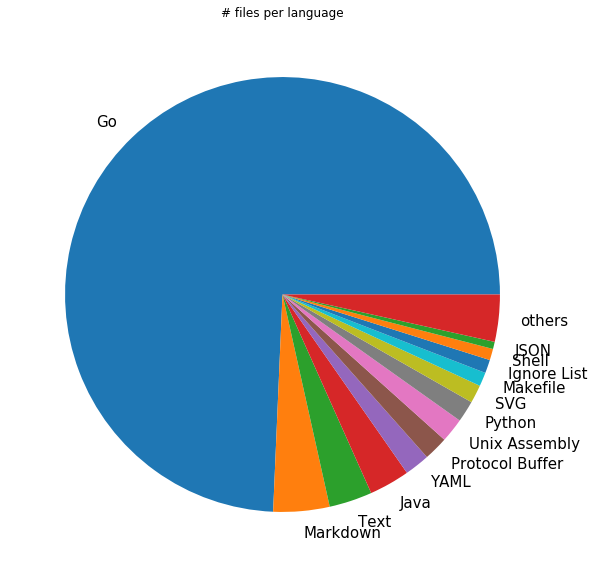

In [15]:
percents = [(100 * c) / sum(counts) for c in counts if c / sum(counts) > 0.005]
if len(percents) < len(langs):
    percents.append(100 - sum(percents))
    labels = langs[:len(percents)-1] + ("others",)
else:
    labels = langs

plt.figure(figsize=(10, 10))

plt.title("# files per language")
_ = plt.pie(percents, labels=labels, textprops={"fontsize": 15})

In [16]:
langs, counts = run("""
SELECT lang, SUM(n)
FROM (
    SELECT lang, SUM(lines) as n
    FROM (
        SELECT f.repository_id, LANGUAGE(cf.file_path, f.blob_content) as lang,
               ARRAY_LENGTH(SPLIT(f.blob_content, '\n')) as lines
        FROM   files AS f
               NATURAL JOIN commit_files cf
               NATURAL JOIN refs
        WHERE  ref_name = 'HEAD'
           AND file_path NOT LIKE 'third_party/%%'
    ) AS t
    WHERE lang IS NOT NULL
    GROUP BY repository_id, lang
) AS t
GROUP by lang
ORDER BY n DESC
""")

2019-04-18 11:54:22 milamber run[11503] INFO done in 10.60 seconds


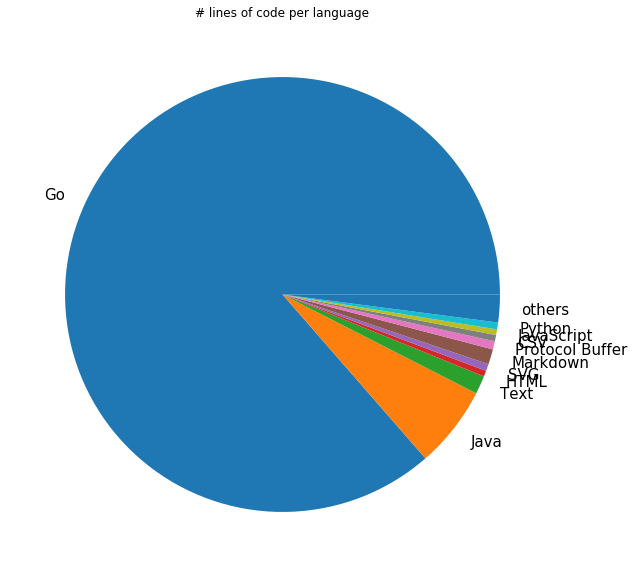

In [17]:
percents = [(100 * c) / sum(counts) for c in counts if c / sum(counts) > 0.004]
if len(percents) < len(langs):
    percents.append(100 - sum(percents))
    langs = langs[:len(percents)-1] + ("others",)

plt.figure(figsize=(10, 10))

plt.title("# lines of code per language")
_ = plt.pie(percents, labels=langs, textprops={"fontsize": 15})



In [18]:
orgs, counts = run("""
    SELECT JSON_EXTRACT(SPLIT(committer_email, '@'), '$[1]') as domain, COUNT(*) as n
    FROM commits
    WHERE committer_email LIKE '%%@%%'
    GROUP BY domain
    ORDER BY n DESC
""")

orgs = [o.strip('""') for o in orgs]

2019-04-18 11:54:24 milamber run[11503] INFO done in 1.50 seconds


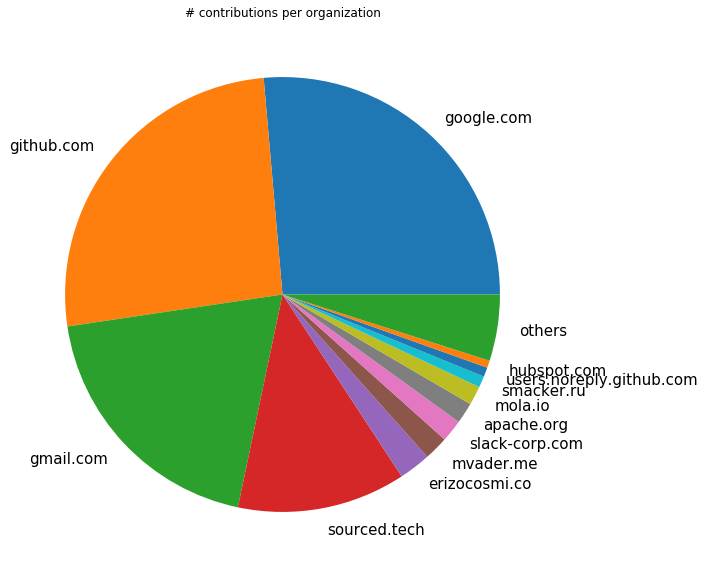

In [19]:
percents = [(100 * c) / sum(counts) for c in counts if c / sum(counts) > 0.005]
if len(percents) < len(orgs):
    percents.append(100 - sum(percents))
    labels = orgs[:len(percents)-1] + ["others"]
else:
    labels = orgs

plt.figure(figsize=(10, 10))

plt.title("# contributions per organization")
_ = plt.pie(percents, labels=labels, textprops={"fontsize": 15})

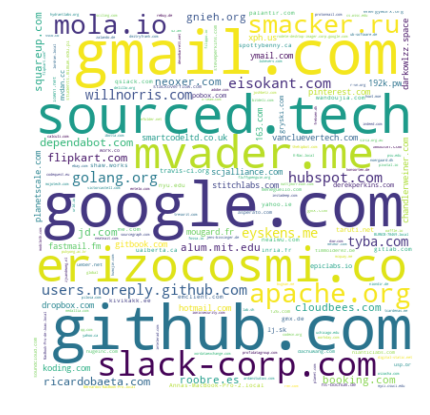

In [20]:
import numpy as np
from wordcloud import WordCloud

log_counts = np.log(counts) + 1
freqs = {org: log_counts[i] for (i, org) in enumerate(orgs)}

wordcloud = WordCloud(
    width=400,
    height=400,
    background_color="white",
    contour_color="blue",
    contour_width=1.0,
    colormap="viridis",
    min_font_size=4
)
wordcloud.generate_from_frequencies(freqs)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
top_contributors, counts = run("""
    SELECT committer_email, COUNT(*) as n
    FROM commits
    GROUP BY committer_email
    ORDER BY n DESC;
""")

2019-04-18 11:54:25 milamber run[11503] INFO done in 0.35 seconds


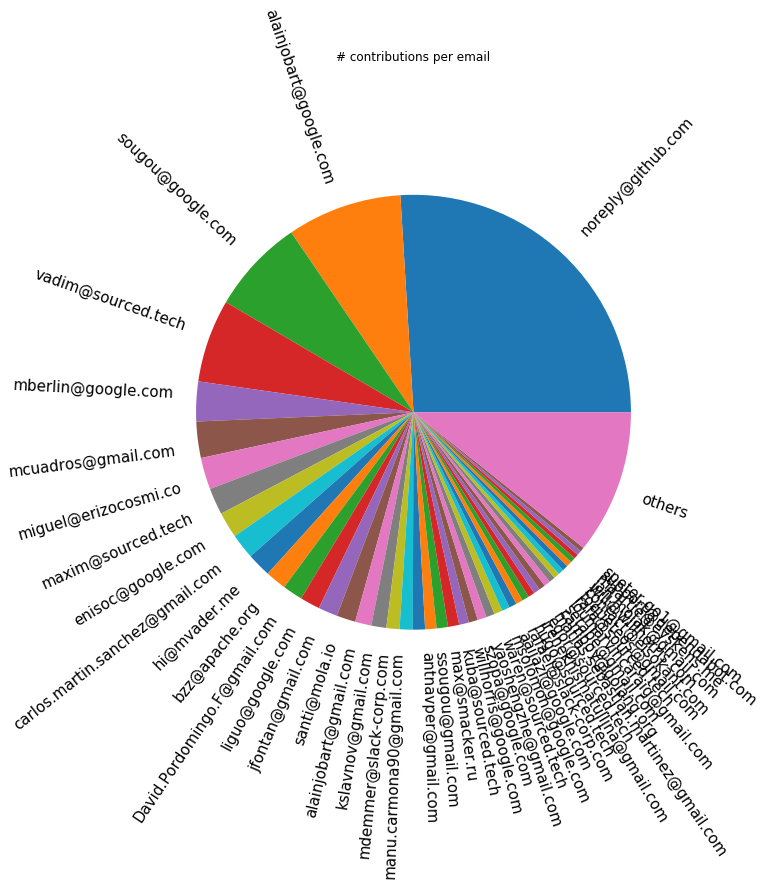

In [22]:
percents = [(100 * c) / sum(counts) for c in counts if c / sum(counts) > 0.003]
if len(percents) < len(top_contributors):
    percents.append(100 - sum(percents))
    labels = list(top_contributors[:len(percents)-1]) + ["others"]
else:
    labels = top_contributors
plt.figure(figsize=(10, 10))

plt.title("# contributions per email", pad=80.0)
_ = plt.pie(percents, labels=labels, rotatelabels=True, textprops={"fontsize": 15})

In [23]:
run_and_print("""
    SELECT file_path,
           uast_extract(uast(blob_content,
                             LANGUAGE(file_path),
                             '//uast:Identifier'),
           "Name") name
    FROM blobs
         NATURAL JOIN commit_files
         NATURAL JOIN refs
    WHERE repository_id = 'c2spoon'
      AND LANGUAGE(file_path) = 'Java'
      AND ref_name = 'HEAD';
""")

2019-04-18 11:54:48 milamber run[11503] INFO done in 21.99 seconds


,file_path,name


In [24]:
repos, last_commit_messages = run("""
    SELECT r.repository_id, c.commit_message
    FROM refs r
    NATURAL JOIN commits c
    WHERE r.ref_name = 'HEAD'
""")

2019-04-18 11:54:48 milamber run[11503] INFO done in 0.08 seconds


In [25]:
for repo, last_commit_message in zip(repos, last_commit_messages):
    display_html('<b>%s</b>: %s' % (repo, last_commit_message))